In [59]:
import numpy as np
import pandas as pd
import os
os.chdir('C:/Users/ankit.bhatia/Google Drive/Python/Python3Scripts/problems')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500 )
import string
import random
import matplotlib as plt
%matplotlib inline
import seaborn as sns
#import warnings
# warnings.filterwarnings('ignore')

In [7]:
list_sno = np.array(range(1,27))
print(list_sno)
list_Names = list(string.ascii_uppercase)
print(list_Names)
list_Age = list(range(21,47))
random.shuffle(list_Age)
print(list_Age)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[36, 32, 27, 28, 43, 31, 23, 24, 39, 30, 42, 26, 34, 45, 46, 33, 38, 44, 40, 37, 41, 29, 35, 21, 25, 22]


In [8]:
dict1 = {'SNo': list_sno, 'Name': list_Names, 'Age': list_Age}
print(dict1)

{'SNo': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26]), 'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], 'Age': [36, 32, 27, 28, 43, 31, 23, 24, 39, 30, 42, 26, 34, 45, 46, 33, 38, 44, 40, 37, 41, 29, 35, 21, 25, 22]}


In [9]:
df = pd.DataFrame(dict1)
print(df.count())
df.head()

Age     26
Name    26
SNo     26
dtype: int64


,Age,Name,SNo
0,36,A,1
1,32,B,2
2,27,C,3
3,28,D,4
4,43,E,5


In [10]:
df.describe()

,Age,SNo
count,26.000000,26.000000
mean,33.500000,13.500000
std,7.648529,7.648529
min,21.000000,1.000000
25%,27.250000,7.250000
50%,33.500000,13.500000
75%,39.750000,19.750000
max,46.000000,26.000000


In [11]:
market_data = pd.read_csv('C:/Users/ankit.bhatia/Google Drive/Python/Python3Scripts/problems/global_sales/market_fact.csv')
market_data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [118]:
# No of records with Sales greater than 2000
print(len(market_data[market_data.Sales > 2000]))
# No of records with Order qty less than or equal to 40
print(len(market_data[market_data.Order_Quantity<=40]))

1872
6674


In [133]:
# combined the above two condintion and calculate Sales(mean)
filterd_Data = market_data.query('Sales > 2000 and Order_Quantity<=40')
round(filterd_Data.Sales.mean(),2)

5943.05

In [12]:
product_data = pd.read_csv('C:/Users/ankit.bhatia/Google Drive/Python/Python3Scripts/problems/global_sales/prod_dimen.csv')
product_data.head()


,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5


In [13]:
# Unique Product category
product_data.Product_Category.unique()

array(['OFFICE SUPPLIES', 'TECHNOLOGY', 'FURNITURE'], dtype=object)

In [16]:
# Join Data
combined_data = pd.merge(market_data,product_data,how ='inner',on='Prod_id')
print(len(combined_data))
combined_data.head()

8399


,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [22]:
# Group by category & Sub-category
grouped_data = combined_data.groupby(by=[combined_data.Product_Category,combined_data.Product_Sub_Category])['Sales']
grouped_data.mean()

Product_Category  Product_Sub_Category          
FURNITURE         BOOKCASES                          4352.656296
                  CHAIRS & CHAIRMATS                 4564.343394
                  OFFICE FURNISHINGS                  885.905850
                  TABLES                             5252.100116
OFFICE SUPPLIES   APPLIANCES                         1698.137189
                  BINDERS AND BINDER ACCESSORIES     1117.986437
                  ENVELOPES                           707.665854
                  LABELS                              135.352604
                  PAPER                               364.451314
                  PENS & ART SUPPLIES                 263.992449
                  RUBBER BANDS                         83.835922
                  SCISSORS, RULERS AND TRIMMERS       562.474375
                  STORAGE & ORGANIZATION             1960.041392
TECHNOLOGY        COMPUTER PERIPHERALS               1049.968259
                  COPIERS AND FAX        

In [26]:
# Sort the Data
sorted_data = combined_data.sort_values(by=['Sales','Profit'])
sorted_data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
6055,Ord_704,Prod_7,SHP_964,Cust_242,2.24,0.01,1,-1.97,0.70,0.37,OFFICE SUPPLIES,RUBBER BANDS
6584,Ord_149,Prod_3,SHP_7028,Cust_1712,3.20,0.09,1,-3.16,1.49,0.37,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES
5928,Ord_4270,Prod_7,SHP_5959,Cust_1450,3.23,0.06,2,-2.73,0.70,0.81,OFFICE SUPPLIES,RUBBER BANDS
150,Ord_4755,Prod_13,SHP_6628,Cust_1579,3.41,0.06,1,-1.78,0.70,0.56,OFFICE SUPPLIES,PENS & ART SUPPLIES
6119,Ord_2252,Prod_3,SHP_3064,Cust_881,3.42,0.05,1,-2.91,1.49,0.37,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES


In [27]:
grouped_data.agg([np.mean,np.median,np.sum,np.std])

mean      median  \
Product_Category Product_Sub_Category                                       
FURNITURE        BOOKCASES                        4352.656296   3044.7000   
                 CHAIRS & CHAIRMATS               4564.343394   3543.8700   
                 OFFICE FURNISHINGS                885.905850    403.1500   
                 TABLES                           5252.100116   3905.7500   
OFFICE SUPPLIES  APPLIANCES                       1698.137189    706.5400   
                 BINDERS AND BINDER ACCESSORIES   1117.986437    212.2800   
                 ENVELOPES                         707.665854    329.0200   
                 LABELS                            135.352604    100.1500   
                 PAPER                             364.451314    200.0800   
                 PENS & ART SUPPLIES               263.992449    112.5900   
                 RUBBER BANDS                       83.835922     71.7700   
                 SCISSORS, RULERS AND TRIMMERS     562.474375    183.6200   
                 STORAGE & ORGANIZATION           1960.041392    747.3350   
TECHNOLOGY       COMPUTER PERIPHERALS             1049.968259    624.8100   
                 COPIERS AND FAX                 12992.658621  12028.2300   
                 OFFICE MACHINES                  6435.303086   3451.8500   
                 TELEPHONES AND COMMUNICATION     2139.653230   1546.3965   

                                                         sum          std  
Product_Category Product_Sub_Category                                      
FURNITURE        BOOKCASES                        822652.040  5013.144828  
                 CHAIRS & CHAIRMATS              1761836.550  4415.022838  
                 OFFICE FURNISHINGS               698093.810  1310.503301  
                 TABLES                          1896008.142  4585.573700  
OFFICE SUPPLIES  APPLIANCES                       736991.540  2532.610686  
                 BINDERS AND BINDER ACCESSORIES  1022957.590  3072.633316  
                 ENVELOPES                        174085.800  1132.037499  
                 LABELS                            38981.550   250.977574  
                 PAPER                            446452.860   467.258455  
                 PENS & ART SUPPLIES              167107.220   375.859979  
                 RUBBER BANDS                      15006.630    65.370699  
                 SCISSORS, RULERS AND TRIMMERS     80996.310  2405.319612  
                 STORAGE & ORGANIZATION          1070182.600  2916.007227  
TECHNOLOGY       COMPUTER PERIPHERALS             795875.940  1430.973587  
                 COPIERS AND FAX                 1130361.300  8827.434505  
                 OFFICE MACHINES                 2168697.140  8412.648480  
                 TELEPHONES AND COMMUNICATION    1889313.802  1871.918242

In [28]:
market_data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [30]:
# Select columns
market_data[['Ord_id','Sales','Order_Quantity','Profit']].head()

,Ord_id,Sales,Order_Quantity,Profit
0,Ord_5446,136.81,23,-30.51
1,Ord_5406,42.27,13,4.56
2,Ord_5446,4701.69,26,1148.90
3,Ord_5456,2337.89,43,729.34
4,Ord_5485,4233.15,35,1219.87


In [31]:
# select particular valus using iat(index at)
market_data.iat[1,2]

'SHP_7549'

In [32]:
# select particular valus using at(labels)
market_data.at[1,'Profit']

4.5599999999999996

In [190]:
combined_data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


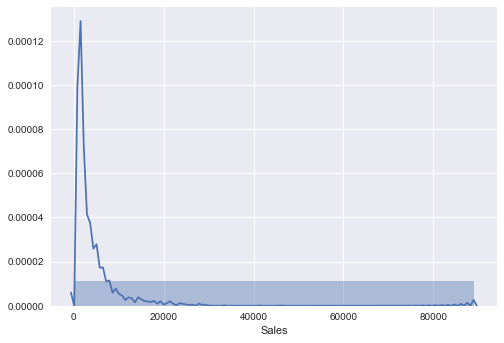

In [45]:
sns.distplot(combined_data['Sales'],bins=1)

In [51]:
combined_data.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


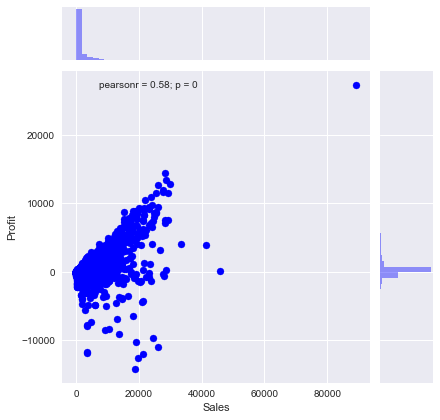

In [56]:
sns.jointplot(data = combined_data,x='Sales',y='Profit')